# 1. Intro Data Scalling 

Khi xử lí dữ liệu thô, gặp nhiều các dữ liệu ạ => khó để phân tích. Các tiếp cận là biến đổi dữ liệu, và đưa về một phân phối chuẩn.

Scaling là biến đổi khoảng giá trị của dữ liệu về 1 khoảng thường là 0-1.

Có 2 cách để scale dữ liệu là normalization và standardization  (Bình thường hóa dữ liệu và chuẩn hóa dữ liệu)

# 2. Normalization

Là 1 phương pháp scale dữ liệu từ miền giá trị bất kì sang miền giá trị nằm trong khoảng 0 đến 1. Yêu cầu xác định giá trị max và giá trị min

$$ y = \frac{x-min}{max-min} $$

Công thức trên áp dụng với từng feature.

Các bước thực hiện normalize sử dụng thư viện scikit-learn với MinMaxScaler
- Fit biến Scaler sử đụng tập dữ liệu huấn luyện. Để normalize thì dữ liệu huấn luyện cần phải xác định được max và min. Để thử hiện thì dùng hàm fit()
- Tiến hành scale dữ liệu bằng hàm transform()
- Áp dụng lại bộ scaler để sử dụng cho việc dự đoán.


# 3. Standardization

là việc scale dữ liệu về một phân bố trong đó giá trị trung bình của quan sát bằng 0 và độ lệch chuẩn = 1. Công thức chuẩn hóa:
$$ y = \frac{x - \text{mean}}{\text{standard_deviation}}$$

với $$\text{mean} = \frac{\text{sum}(x)}{\text{count}(x)}$$
Độ lệch chuẩn
$$\text{standard_deviation} = \sqrt{\frac{\text{sum}\big{(} (x-mean)^2\big{)}}{\text{count}(x)}}$$

# 4. Feature Encoding
Machine learning models can only work with numberical values => It is necessary to transform the categorical values of the revant features into numerical ones => called feature encoding.
- one-hot encoding: Assigns vectors to each category. The vector represent whether the corresponding feature is present (1) or not (0).
- target-mean encoding: Replaces categorical values with the mean of the target variable.
- frequency encoding: Takes into account how many times a given categorical value is present in relation with a feature.


# 5. Example
## 5.1 Preprocessing data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
dataset = pd.read_csv('train_titanic.csv')
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
dataset = dataset.drop(['PassengerId','Name','Cabin','Ticket'],axis=1)

In [5]:
dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [7]:
dataset[['Embarked']].isna().sum()

Embarked    2
dtype: int64

In [8]:
dataset['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [9]:
dataset

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [10]:
dataset['Age'].mean()

29.69911764705882

In [11]:
dataset['Age'].fillna(value=dataset['Age'].mean(), inplace=True)
dataset['Fare'].fillna(value=dataset['Fare'].mean(), inplace=True)
dataset['Sex'] = dataset['Sex'].apply(lambda x: 0 if x == 'female' else 1)
dataset['Embarked'].fillna(value ='S', inplace=True)

In [12]:
y = dataset.iloc[:,0].values
X = dataset.iloc[:,1:].values
X[:5]

array([[3, 1, 22.0, 1, 0, 7.25, 'S'],
       [1, 0, 38.0, 1, 0, 71.2833, 'C'],
       [3, 0, 26.0, 0, 0, 7.925, 'S'],
       [1, 0, 35.0, 1, 0, 53.1, 'S'],
       [3, 1, 35.0, 0, 0, 8.05, 'S']], dtype=object)

In [13]:
# one-host encoding column Embarked
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[-1])], remainder='passthrough' )
X = np.array(ct.fit_transform(X))

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [15]:
X[:5]

array([[0.0, 0.0, 1.0, 3, 1, 22.0, 1, 0, 7.25],
       [1.0, 0.0, 0.0, 1, 0, 38.0, 1, 0, 71.2833],
       [0.0, 0.0, 1.0, 3, 0, 26.0, 0, 0, 7.925],
       [0.0, 0.0, 1.0, 1, 0, 35.0, 1, 0, 53.1],
       [0.0, 0.0, 1.0, 3, 1, 35.0, 0, 0, 8.05]], dtype=object)

In [16]:
columns_data =['Cherbourg','Queenstown','Southampton','Pclass','Sex','Age','SibSp','Parch','Fare']
datasetnew =  pd.DataFrame(X,columns=columns_data)
datasetnew['Survived']=y
datasetnew.head()

,Cherbourg,Queenstown,Southampton,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,0.0,0.0,1.0,3,1,22.0,1,0,7.25,0
1,1.0,0.0,0.0,1,0,38.0,1,0,71.2833,1
2,0.0,0.0,1.0,3,0,26.0,0,0,7.925,1
3,0.0,0.0,1.0,1,0,35.0,1,0,53.1,1
4,0.0,0.0,1.0,3,1,35.0,0,0,8.05,0


In [17]:
datasetnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cherbourg    891 non-null    object
 1   Queenstown   891 non-null    object
 2   Southampton  891 non-null    object
 3   Pclass       891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Fare         891 non-null    object
 9   Survived     891 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 69.7+ KB


In [18]:
datasetnew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cherbourg    891 non-null    object
 1   Queenstown   891 non-null    object
 2   Southampton  891 non-null    object
 3   Pclass       891 non-null    object
 4   Sex          891 non-null    object
 5   Age          891 non-null    object
 6   SibSp        891 non-null    object
 7   Parch        891 non-null    object
 8   Fare         891 non-null    object
 9   Survived     891 non-null    int64 
dtypes: int64(1), object(9)
memory usage: 69.7+ KB


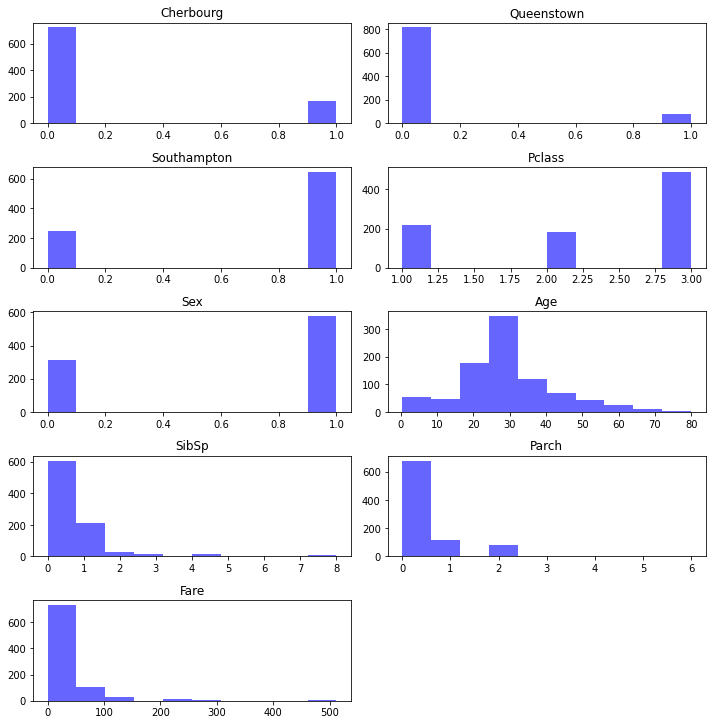

In [19]:
num_list = list(datasetnew.columns)
fig = plt.figure(figsize=(10,30))
                 
for i in range(len(num_list)-1):
    plt.subplot(15, 2, i+1)
    plt.title(num_list[i])
    plt.hist(datasetnew[num_list[i]], color='b', alpha=0.6)
plt.tight_layout()
plt.show()


## 5.2 Test model  
test model when don't use standardization and sormalization

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=45)

In [22]:
X

array([[0.0, 0.0, 1.0, ..., 1, 0, 7.25],
       [1.0, 0.0, 0.0, ..., 1, 0, 71.2833],
       [0.0, 0.0, 1.0, ..., 0, 0, 7.925],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 2, 23.45],
       [1.0, 0.0, 0.0, ..., 0, 0, 30.0],
       [0.0, 1.0, 0.0, ..., 0, 0, 7.75]], dtype=object)

In [23]:
def Test_model(X_train,X_test,y_train,y_test,scalling):
    classifications = [['DecisionTreeClassifier',DecisionTreeClassifier()],
                      ['KNeighborsClassifier',KNeighborsClassifier()],
                      ['MLPClassifier',MLPClassifier(max_iter=500)]]
    Acc = pd.DataFrame(index=None,columns=['Model','Accuracy','Scalling'])
    for mod in classifications :
        name = mod[0]
        model = mod[1]
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        Acc = Acc.append(pd.Series({'Model':name,'Accuracy':accuracy_score(y_test,y_pred),'Scalling':scalling}),ignore_index=True)
    #print(Acc.sort_values(by='Accuracy',ascending=False))
    return Acc

In [24]:
df1 = Test_model(X_train,X_test,y_train,y_test,'No Scalling')

# 5.3 Test model with Normalization

In [25]:
data_nor = datasetnew.copy()
data_nor.head()

,Cherbourg,Queenstown,Southampton,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,0.0,0.0,1.0,3,1,22.0,1,0,7.25,0
1,1.0,0.0,0.0,1,0,38.0,1,0,71.2833,1
2,0.0,0.0,1.0,3,0,26.0,0,0,7.925,1
3,0.0,0.0,1.0,1,0,35.0,1,0,53.1,1
4,0.0,0.0,1.0,3,1,35.0,0,0,8.05,0


In [26]:
MNScaler = MinMaxScaler()
data_nor[['Age','Fare']] = MNScaler.fit_transform(data_nor[['Age','Fare']])
data_nor.head()

,Cherbourg,Queenstown,Southampton,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,0.0,0.0,1.0,3,1,0.271174,1,0,0.014151,0
1,1.0,0.0,0.0,1,0,0.472229,1,0,0.139136,1
2,0.0,0.0,1.0,3,0,0.321438,0,0,0.015469,1
3,0.0,0.0,1.0,1,0,0.434531,1,0,0.103644,1
4,0.0,0.0,1.0,3,1,0.434531,0,0,0.015713,0


In [27]:
data_nor['Cherbourg'] = data_nor['Cherbourg'].apply(lambda x: 0 if x == 0.0 else 1)
data_nor['Queenstown'] = data_nor['Queenstown'].apply(lambda x: 0 if x == 0.0 else 1)
data_nor['Southampton'] = data_nor['Southampton'].apply(lambda x: 0 if x == 0.0 else 1)

In [28]:
data_nor

,Cherbourg,Queenstown,Southampton,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,0,0,1,3,1,0.271174,1,0,0.014151,0
1,1,0,0,1,0,0.472229,1,0,0.139136,1
2,0,0,1,3,0,0.321438,0,0,0.015469,1
3,0,0,1,1,0,0.434531,1,0,0.103644,1
4,0,0,1,3,1,0.434531,0,0,0.015713,0
...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,2,1,0.334004,0,0,0.025374,0
887,0,0,1,1,0,0.233476,0,0,0.058556,1
888,0,0,1,3,0,0.367921,1,2,0.045771,0
889,1,0,0,1,1,0.321438,0,0,0.058556,1


In [29]:
data_nor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cherbourg    891 non-null    int64  
 1   Queenstown   891 non-null    int64  
 2   Southampton  891 non-null    int64  
 3   Pclass       891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   Fare         891 non-null    float64
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [30]:
X_nor = data_nor.iloc[:,:-1].values
y_nor = data_nor.iloc[:,1].values
print(X_nor[:5])
print(y_nor[:5])

[[0 0 1 3 1 0.2711736617240512 1 0 0.014151057562208049]
 [1 0 0 1 0 0.4722292033174164 1 0 0.13913573538264068]
 [0 0 1 3 0 0.32143754712239253 0 0 0.015468569817999833]
 [0 0 1 1 0 0.4345312892686604 1 0 0.10364429745562033]
 [0 0 1 3 1 0.4345312892686604 0 0 0.015712553569072387]]
[0 0 0 0 0]


In [31]:
X_nor_train, X_nor_test, y_nor_train, y_nor_test = train_test_split(X_nor, y_nor, test_size=0.3)

In [32]:
df2 = Test_model(X_nor_train, X_nor_test, y_nor_train, y_nor_test,'Normalization')

# 5.4 Test model with Standardization

In [33]:
data_stand = datasetnew.copy()
data_stand.head()

,Cherbourg,Queenstown,Southampton,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,0.0,0.0,1.0,3,1,22.0,1,0,7.25,0
1,1.0,0.0,0.0,1,0,38.0,1,0,71.2833,1
2,0.0,0.0,1.0,3,0,26.0,0,0,7.925,1
3,0.0,0.0,1.0,1,0,35.0,1,0,53.1,1
4,0.0,0.0,1.0,3,1,35.0,0,0,8.05,0


In [34]:
standardScaler = StandardScaler()
data_stand[['Age','Fare']]= standardScaler.fit_transform(data_stand[['Age','Fare']])
data_stand.head()

,Cherbourg,Queenstown,Southampton,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,0.0,0.0,1.0,3,1,-0.592481,1,0,-0.502445,0
1,1.0,0.0,0.0,1,0,0.638789,1,0,0.786845,1
2,0.0,0.0,1.0,3,0,-0.284663,0,0,-0.488854,1
3,0.0,0.0,1.0,1,0,0.407926,1,0,0.420730,1
4,0.0,0.0,1.0,3,1,0.407926,0,0,-0.486337,0


In [35]:
data_stand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Cherbourg    891 non-null    object 
 1   Queenstown   891 non-null    object 
 2   Southampton  891 non-null    object 
 3   Pclass       891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    object 
 7   Parch        891 non-null    object 
 8   Fare         891 non-null    float64
 9   Survived     891 non-null    int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 69.7+ KB


In [36]:
X_stand = data_stand.iloc[:,:-1].values
y_stand = data_stand.iloc[:,-1].values
X_stand_train, X_stand_test, y_stand_train, y_stand_test = train_test_split(X_stand, y_stand, test_size = 0.3)

In [37]:
df3= Test_model(X_stand_train, X_stand_test, y_stand_train, y_stand_test,'Standardization')

In [38]:
df_ac = pd.concat([df1,df3,df2])
print(df_ac)

                    Model  Accuracy         Scalling
0  DecisionTreeClassifier  0.768657      No Scalling
1    KNeighborsClassifier  0.694030      No Scalling
2           MLPClassifier  0.817164      No Scalling
0  DecisionTreeClassifier  0.776119  Standardization
1    KNeighborsClassifier  0.798507  Standardization
2           MLPClassifier  0.820896  Standardization
0  DecisionTreeClassifier  1.000000    Normalization
1    KNeighborsClassifier  0.996269    Normalization
2           MLPClassifier  1.000000    Normalization


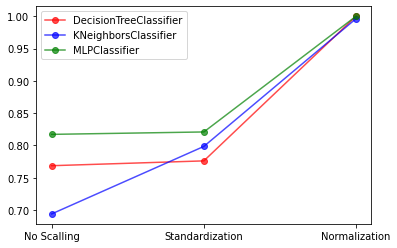

In [39]:

cdict = {'DecisionTreeClassifier':'red', 'KNeighborsClassifier':'blue', 'MLPClassifier': 'green'}
fig, ax =  plt.subplots()




for model in cdict.keys():
    df=df_ac[df_ac['Model']==model]
    plt.plot(df['Scalling'],df['Accuracy'],c=cdict[model],label=model, marker='o', alpha = 0.7)
plt.legend()
plt.show()